In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
df = pd.read_hdf('summary.h5')


new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index


In [4]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax best 18k',
            'best18k properMotion  HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': '5-10d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO discov\nH<=16',
            'CumulativeCompleteness H <= 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO discov\nH<=22',
            'CumulativeCompleteness H <= 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer': 'TNO discov\nH<=6',
             'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer': 'Vatira discov\nH<=16',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_zlim  HealpixSlicer': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'KNe Presto S',
            'Total detected XRBPopMetric__early_detect  UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7  HealpixSlicer': 'Brown Dwarf Vol',}
invert_cols = ['parallax best 18k', 'proper motion best 18k']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Median CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]


In [5]:
df

metric,Mean SnL_ELAISS1 HealpixSubsetSlicer,Median SnL_ELAISS1 HealpixSubsetSlicer,Sum SnL_ELAISS1 HealpixSubsetSlicer,"Median ELAISS1, Count all HealpixSubsetSlicer",Mean SnL_XMM_LSS HealpixSubsetSlicer,Median SnL_XMM_LSS HealpixSubsetSlicer,Sum SnL_XMM_LSS HealpixSubsetSlicer,"Median XMM_LSS, Count all HealpixSubsetSlicer",Mean SnL_ECDFS HealpixSubsetSlicer,Median SnL_ECDFS HealpixSubsetSlicer,...,Mean CoaddM5 y HealpixSlicer,Rms CoaddM5 y HealpixSlicer,Median CoaddM5 y HealpixSlicer,Max CoaddM5 y HealpixSlicer,Min CoaddM5 y HealpixSlicer,N(+3Sigma) CoaddM5 y HealpixSlicer,N(-3Sigma) CoaddM5 y HealpixSlicer,CoaddM5 y HealpixSlicer,top18k CoaddM5 y HealpixSlicer,10th%ile CoaddM5 y HealpixSlicer
no_twilight_neo_v2.2,0.000009,0.000009,0.013338,10359.0,0.000009,0.000009,0.013478,10731.0,0.000009,0.000010,...,24.493170,0.513982,24.719432,26.688259,21.001292,78.0,277.0,29880.0,24.484924,23.696911
twi_neo_repeat3_iz_np1_v2.2,0.000009,0.000009,0.013495,10325.0,0.000011,0.000011,0.016346,10810.0,0.000010,0.000010,...,24.444780,0.506688,24.676505,26.695817,21.129982,84.0,300.0,29873.0,24.425394,23.653196
twi_neo_repeat3_iz_np2_v2.2,0.000009,0.000010,0.014131,10394.0,0.000010,0.000010,0.014733,10817.0,0.000010,0.000010,...,24.473321,0.503335,24.697270,26.692438,21.287149,81.0,319.0,29891.0,24.455171,23.707904
twi_neo_repeat3_iz_np3_v2.2,0.000010,0.000010,0.014406,10298.0,0.000009,0.000010,0.014191,10858.0,0.000010,0.000010,...,24.480691,0.506839,24.710979,26.686866,21.014870,81.0,291.0,29884.0,24.466813,23.710763
twi_neo_repeat3_iz_np4_v2.2,0.000009,0.000010,0.014069,10355.0,0.000009,0.000009,0.013846,10749.0,0.000010,0.000010,...,24.483580,0.511719,24.719778,26.689836,20.678210,78.0,282.0,29872.0,24.471132,23.696310
twi_neo_repeat3_iz_np5_v2.2,0.000010,0.000010,0.015009,10368.0,0.000010,0.000010,0.014671,10812.0,0.000010,0.000010,...,24.473932,0.509508,24.705729,26.679958,21.065941,79.0,302.0,29878.0,24.469793,23.686113
twi_neo_repeat3_iz_np6_v2.2,0.000009,0.000009,0.014028,10373.0,0.000010,0.000010,0.014880,10814.0,0.000009,0.000009,...,24.474057,0.506497,24.702801,26.692726,21.197903,80.0,306.0,29888.0,24.465229,23.697167
twi_neo_repeat3_iz_np7_v2.2,0.000009,0.000009,0.014141,10399.0,0.000010,0.000010,0.015014,10850.0,0.000009,0.000010,...,24.478980,0.505620,24.701484,26.687318,20.549921,81.0,305.0,29873.0,24.468737,23.719157
twi_neo_repeat3_riz_np1_v2.2,0.000009,0.000010,0.014237,10398.0,0.000010,0.000010,0.015539,10854.0,0.000010,0.000010,...,24.446032,0.499483,24.676002,26.687340,20.238280,85.0,306.0,29867.0,24.413086,23.697413
twi_neo_repeat3_riz_np2_v2.2,0.000010,0.000010,0.014283,10373.0,0.000010,0.000010,0.015066,10814.0,0.000010,0.000010,...,24.468715,0.505497,24.699589,26.690808,21.066376,81.0,286.0,29877.0,24.444135,23.691205


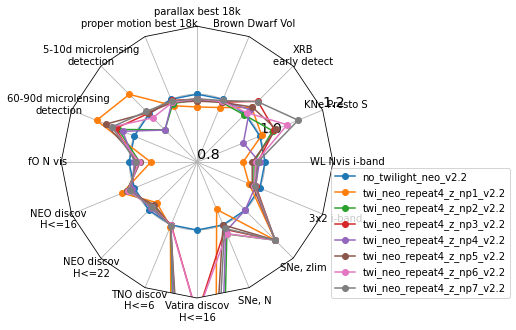

In [6]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat4_z_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

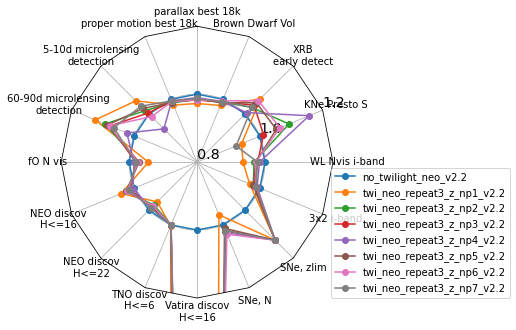

In [7]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat3_z_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

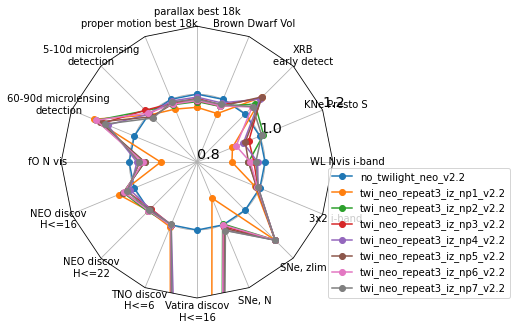

In [8]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat3_iz_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

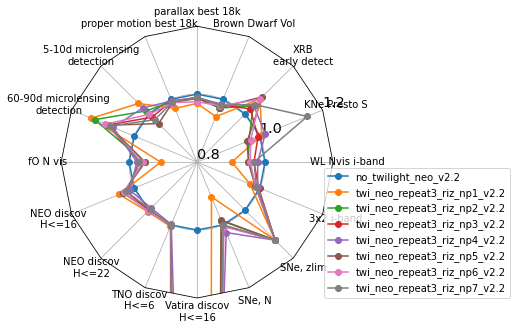

In [9]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat3_riz_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

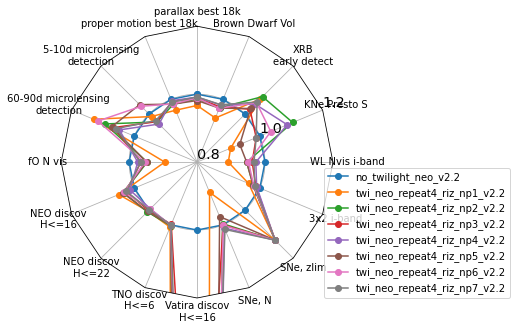

In [10]:
runs = ['no_twilight_neo_v2.2'] + [run for run in df.index if 'repeat4_riz_' in run]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='no_twilight_neo_v2.2')

fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [11]:
df['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer']*10000

no_twilight_neo_v2.2              4.0
twi_neo_repeat3_iz_np1_v2.2     181.0
twi_neo_repeat3_iz_np2_v2.2      64.0
twi_neo_repeat3_iz_np3_v2.2      46.0
twi_neo_repeat3_iz_np4_v2.2      15.0
twi_neo_repeat3_iz_np5_v2.2      66.0
twi_neo_repeat3_iz_np6_v2.2      62.0
twi_neo_repeat3_iz_np7_v2.2      47.0
twi_neo_repeat3_riz_np1_v2.2    162.0
twi_neo_repeat3_riz_np2_v2.2     58.0
twi_neo_repeat3_riz_np3_v2.2     40.0
twi_neo_repeat3_riz_np4_v2.2     14.0
twi_neo_repeat3_riz_np5_v2.2     42.0
twi_neo_repeat3_riz_np6_v2.2     56.0
twi_neo_repeat3_riz_np7_v2.2     39.0
twi_neo_repeat3_z_np1_v2.2       96.0
twi_neo_repeat3_z_np2_v2.2       27.0
twi_neo_repeat3_z_np3_v2.2       20.0
twi_neo_repeat3_z_np4_v2.2       15.0
twi_neo_repeat3_z_np5_v2.2       34.0
twi_neo_repeat3_z_np6_v2.2       19.0
twi_neo_repeat3_z_np7_v2.2       18.0
twi_neo_repeat4_iz_np1_v2.2     102.0
twi_neo_repeat4_iz_np2_v2.2      22.0
twi_neo_repeat4_iz_np3_v2.2      19.0
twi_neo_repeat4_iz_np4_v2.2      18.0
twi_neo_repe

Text(0, 0.5, 'Vatrias H<=16 (N/10,000)')

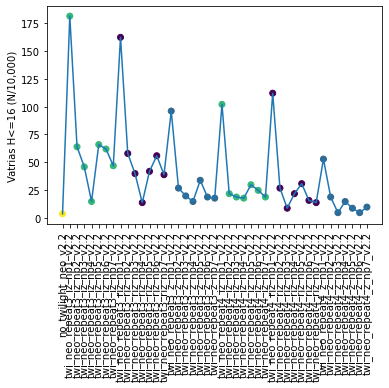

In [12]:
fig, ax = plt.subplots()

color_mapping = {'_iz_': 0, '_riz_': 1, '_z_': 2, '_iz_': 3, 'no_': 4}

colors = []
for rn in df.index:
    for key in color_mapping:
        if key in rn:
            colors.append(color_mapping[key])

            
yvals = df['CumulativeCompleteness H <= 16.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer']*10e3
ax.plot(yvals)

ack = ax.tick_params('x',  rotation=90)
ax.scatter(np.arange(yvals.size), yvals, c=colors )
ax.set_ylabel('Vatrias H<=16 (N/10,000)')